### <p style="text-align: right;"> &#9989; Mounika Jetti</p>

#### <p style="text-align: right;"> &#9989; Put names of your group members</p>

# Day 8 In-class Assignment: Exploring Great Lakes Water Levels using NumPy

In today's activity, were going to use NumPy and Matplotlib to interact with some data that pertains to the water levels of the Great Lakes. You'll also get to practice some of the plot modifications that you learned out in the last class.

![picture](https://upload.wikimedia.org/wikipedia/commons/5/57/Great_Lakes_from_space_crop_labeled.jpg)

### This assignment contains bonus content: practice with debugging! (See Part 2 at the end of the assignment)

## Learning Goals:

By the end of this assignment you should be able to:

* Load data using NumPy so that you can visualize it using matplotlib
* Work with NumPy "array" objects to compute simple statistics using built-in NumPy functions.
* Use NumPy and matplotlib to look for correlation in data
---

## Part 1: Using NumPy to explore the water level history of the Great Lakes

In [68]:
# Although there are some exceptions, it is generally a good idea to keep all of your
# imports in one place so that you can easily manage them. Doing so also makes it easy
# to copy all of them at once and paste them into a new notebook you are starting.

# Bring in NumPy and Matplotlib, allowing for plots inside of the notebook.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
USER_NAME = "temp"

To use this notebook for your in-class assignment, you will need these files:
* `lake_mhu.csv`
* `lake_superior.csv`
* `lake_erie.csv`
* `lake_ontario.csv`

These files are given with this notebook on D2L. You will read data from those files and it is important that the files are in the correct place on your computer; that is, the Jupyter notebook needs to know where your computer put the files on your laptop's disk. Take some time right now to be sure you have the files on your laptop and that you know where they are. Work with other members of your group to be sure everyone knows where the files are. For example, on a Mac (which uses OSX, a unix-like operating system) they will be in the Downloads folder - with the Finder, you can move the files wherever you wish.

The easiest way to ensure you can get your notebook to work with files is to make sure they are in the same directory/folder. This may be trivial if, for example, everything is in your downloads folder. Work with the other students in your group or the TAs/LAs if you have problems.

* Take a moment to look at the contents of these files with an editor on your computer.  For example, `*.csv` files open with Excel or, even better, look at it with a simple text editor like NotePad or TextEdit or just try opening it inside your Jupyter Notebook interface.

We are going to use NumPy to read data in from files and look at the data. The standard method for doing this in NumPy is `loadtxt`. In principle, `loadtxt` is simple - it loads your data into NumPy arrays for you to use them. Unfortunately, data almost never comes in a form that is entirely clean and you will need to give many options that are file dependent. You will need to look at your file to know what you need to; for today, we already looked at the file for you and wrote a `loadtxt` command for you. Here it is; run this cell:

In [2]:
# use NumPy to read data from a csv file
# first example of loadtxt()
alldata = np.loadtxt("lake_mhu.csv", usecols = (0,1), skiprows = 1, delimiter=',') # example for the mhu.csv file

&#9989;&nbsp; The above command will open the file `lake_mhu.csv`, skip the 1st row, then load in all of the data in columns 0 and 1 into the variable named `alldata`.  In the cell below, write a command to display the contents of `alldata` (A common command you have used many times).  

In [3]:
# Display alldata here
display(alldata)

array([[1860.       ,  177.3351667],
       [1861.       ,  177.3318333],
       [1862.       ,  177.316    ],
       [1863.       ,  177.1796667],
       [1864.       ,  176.9955833],
       [1865.       ,  176.90525  ],
       [1866.       ,  176.80575  ],
       [1867.       ,  176.9365833],
       [1868.       ,  176.7891667],
       [1869.       ,  176.8250833],
       [1870.       ,  177.1      ],
       [1871.       ,  177.0769167],
       [1872.       ,  176.7318333],
       [1873.       ,  176.9188333],
       [1874.       ,  177.0413333],
       [1875.       ,  176.9683333],
       [1876.       ,  177.2855833],
       [1877.       ,  177.1971667],
       [1878.       ,  177.1183333],
       [1879.       ,  176.85325  ],
       [1880.       ,  176.90425  ],
       [1881.       ,  177.0205   ],
       [1882.       ,  177.1250833],
       [1883.       ,  177.2096667],
       [1884.       ,  177.2734167],
       [1885.       ,  177.3208333],
       [1886.       ,  177.3893333],
 

This is not a great organization of the data because `alldata` is a two dimensional variable (many rows and two columns).  The command below will load the data slightly smarter. Run this command and answers the detailed questions below.

In [7]:
# use NumPy to read data from a csv file
# second, better example of loadtxt()
mhu_date, mhu_level = np.loadtxt("lake_mhu.csv", usecols = (0,1), unpack=True, skiprows = 1, delimiter=',') # example for the mhu.csv file
# print(mhu_date, mhu_level)

&#9989;&nbsp; Now, go through, in order, and **explain in your own words** what each input argument for the `loadtxt()` function is doing (**make sure you read and understand all of this!**):




<font size="+3">&#9998;</font> Write answers here:
* `"lake_mhu.csv"` is * the path to dataset*
* `usecols` is *Number of columns of data to be considered in the dataset file*
* `unpack`, is *returns individual column separately, which can be used to assign to multiple variables* (THIS IS THE ONE ITEM DIFFERENT FROM THE FIRST LOAD COMMAND,see below for an explanation)
* `skiprows` is... *Number of rows to be skipped. We do this to skip headers or column names* (why are we skipping a row?)
* `delimiter` is... *Delimiter defines the literal which is used to separate a data point in a row of the dataset. We used "," because, its a csv file. csv is comma separated value* (why is it using `","`?)
* `mhu_date` is *One of the return value of np.loadtxt. Here, its a list of years*...

To understand what the *unpack* parameter is doing, we need to think a bit about how Python works. In most programming languages you have a construct like this:

`variable = do_something()`

where the result of `do_something` returns a value into `variable`. Python allows you to create *multiple* things and assign them into *multiple* variables: note that there are two variables, `mhu_date` and `mhu_level`, on the left hand side. To allow for this, `loadtxt` uses the `unpack=True` to unpack the colummns into separate items so that you can put them into separate variables. This is extremely handy, as you will see many times this semester.

As you can see, **there is a lot in that one line**. Reading and writing files is never very clean and easy -- take your time thinking through it every time you do it. Although we won't do it today, there is another command `savetxt` for saving into a file: if you use these consistently to prepare you data, it will make files that are easier to read in later. Preparing data from outside sources for loading and analysis often takes time.  

Once you have your data, it is always a good idea to look at some of it to be sure it is what you think it is. You could use a print statement, or just type the variable name in an empty cell.

In [8]:
mhu_date

array([1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868.,
       1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877.,
       1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886.,
       1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895.,
       1896., 1897., 1898., 1898., 1900., 1901., 1902., 1903., 1904.,
       1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913.,
       1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922.,
       1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
       1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940.,
       1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987.,

&#9989;&nbsp; Next, write some code in this cell to read the data from the other files. Use descriptive variable names to store the results.

In [13]:
# Read in data from the remaining files.
erie_date, erie_level = np.loadtxt("lake_erie.csv", usecols = (0,1), unpack=True, skiprows = 1, delimiter=',')
ontario_date, ontario_level = np.loadtxt("lake_ontario.csv", usecols = (0,1), unpack=True, skiprows = 1, delimiter=',') 
superior_date, superior_level = np.loadtxt("lake_superior.csv", usecols = (0,1), unpack=True, skiprows = 1, delimiter=',') 
# Print some of the values coming in from the files to ensure they look fine.
print(erie_date)
print(ontario_level)
print(type(mhu_date))

[1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871.
 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883.
 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895.
 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907.
 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919.
 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931.
 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943.
 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967.
 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979.
 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.]
[75.04616667 75.23291667 75.23841667 75.11383333 7

&#9989;&nbsp; **Question**: Before you move on, what is the variable type of the lake data you've loaded? Use the `type()` function to check on the `mhu_date` and `mhu_level` variables. Does this match your expectations?

<font size="+3">&#9998;</font> *Since we are using numpy, I expect data to be a numpy nd-array. I verified it by running type(mhu_date) and it matches my expectation*

___
### Statistics
___

&#9989;&nbsp; Now that you have read in the data, use NumPy's [statistics operations](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html) from the pre-class to compare various properties of the water levels for all of the lakes.
* mean
* median
* standard deviation


In [21]:
# Put your code here to print the statistical properties of each lake's water levels.
erie_mean = np.mean(erie_level)
erie_median = np.median(erie_level)
erie_std = np.std(erie_level)
print(f"Erie lake has a mean of {round(erie_mean,3)}, median of {round(erie_median,3)}, standard deviation of {round(erie_std,3)}")

ontario_mean = np.mean(ontario_level)
ontario_median = np.median(ontario_level)
ontario_std = np.std(ontario_level)
print(f"ontario lake has a mean of {round(ontario_mean,3)}, median of {round(ontario_median,3)}, standard deviation of {round(ontario_std,3)}")

superior_mean = np.mean(superior_level)
superior_median = np.median(superior_level)
superior_std = np.std(superior_level)
print(f"superior lake has a mean of {round(superior_mean,3)}, median of {round(superior_median,3)}, standard deviation of {round(superior_std,3)}")

mhu_mean = np.mean(mhu_level)
mhu_median = np.median(mhu_level)
mhu_std = np.std(mhu_level)
print(f"mhu lake has a mean of {round(mhu_mean,3)}, median of {round(mhu_median,3)}, standard deviation of {round(mhu_std,3)}")


Erie lake has a mean of 174.219, median of 174.234, standard deviation of 0.294
ontario lake has a mean of 74.778, median of 74.794, standard deviation of 0.252
superior lake has a mean of 183.403, median of 183.404, standard deviation of 0.148
mhu lake has a mean of 176.573, median of 176.594, standard deviation of 0.4


___
&#9989;&nbsp; Now, let's see what is in the files by plotting the second column versus the first column using `matplotlib`. Do this for all of the files. This is our first example of doing some (very simple!) data science - looking at some real data. Just so you know, the data came from [here](https://www.glerl.noaa.gov/data/wlevels/#observations); if you ever find data like this in the real world, you could build a notebook like this one to examine it. In fact, your projects at the end of the semester might be much larger versions of this. 

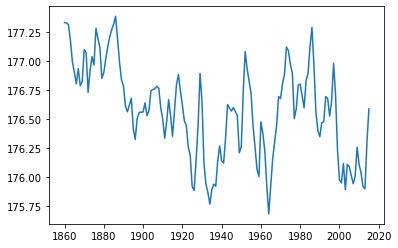

In [24]:
# plot the water levels here
plt.plot(mhu_date,mhu_level)

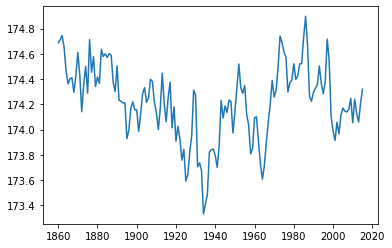

In [25]:
plt.plot(erie_date,erie_level)


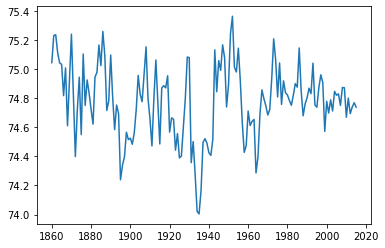

In [26]:
plt.plot(ontario_date,ontario_level)


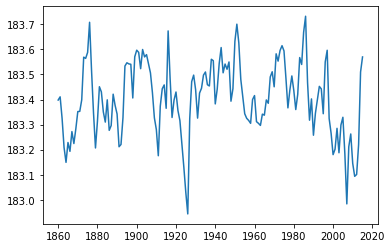

In [27]:
plt.plot(superior_date,superior_level)

Plots like this are not very useful. If you showed them to someone else they would have no idea what is in them. In fact, if *you* looked at them next week, you wouldn't remember what is in them. Let's use a little more `matplotlib` to make them of professional quality. There are two things that every plot should have: labels on each axis. And, there are many other options:
* [grid](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.grid.html)
* [title](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.title.html)
* [markers](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)
* [legend](https://matplotlib.org/users/legend_guide.html)
* and many more we will see over time...

&#9989;&nbsp; **First**, remake separate figures for each of the datasets you read in and include in the plots: $x$-axis labels, $y$-axis labels, grid lines, markers, and a title.

**Then**, make all of them in the *same* plot using the same formating techniques you used in the separate plots but also *add a legend*.

We are not going to tell you how to do this directly! But, we're here to help you to figure it out. If you find yourself waiting for help from an instructor, you can also try using Google to answer your questions. Searching the internet for coding tips and tricks is a very common practice!

The Python community also provides helpful resources: they have created a comprehensive gallery of just about any plot you can think of with an example *and the code that goes with it*. That gallery is [here](https://matplotlib.org/gallery.html) and you should be able to find many examples of how to make your plots look professional. (You just might want to bookmark that webpage.....)

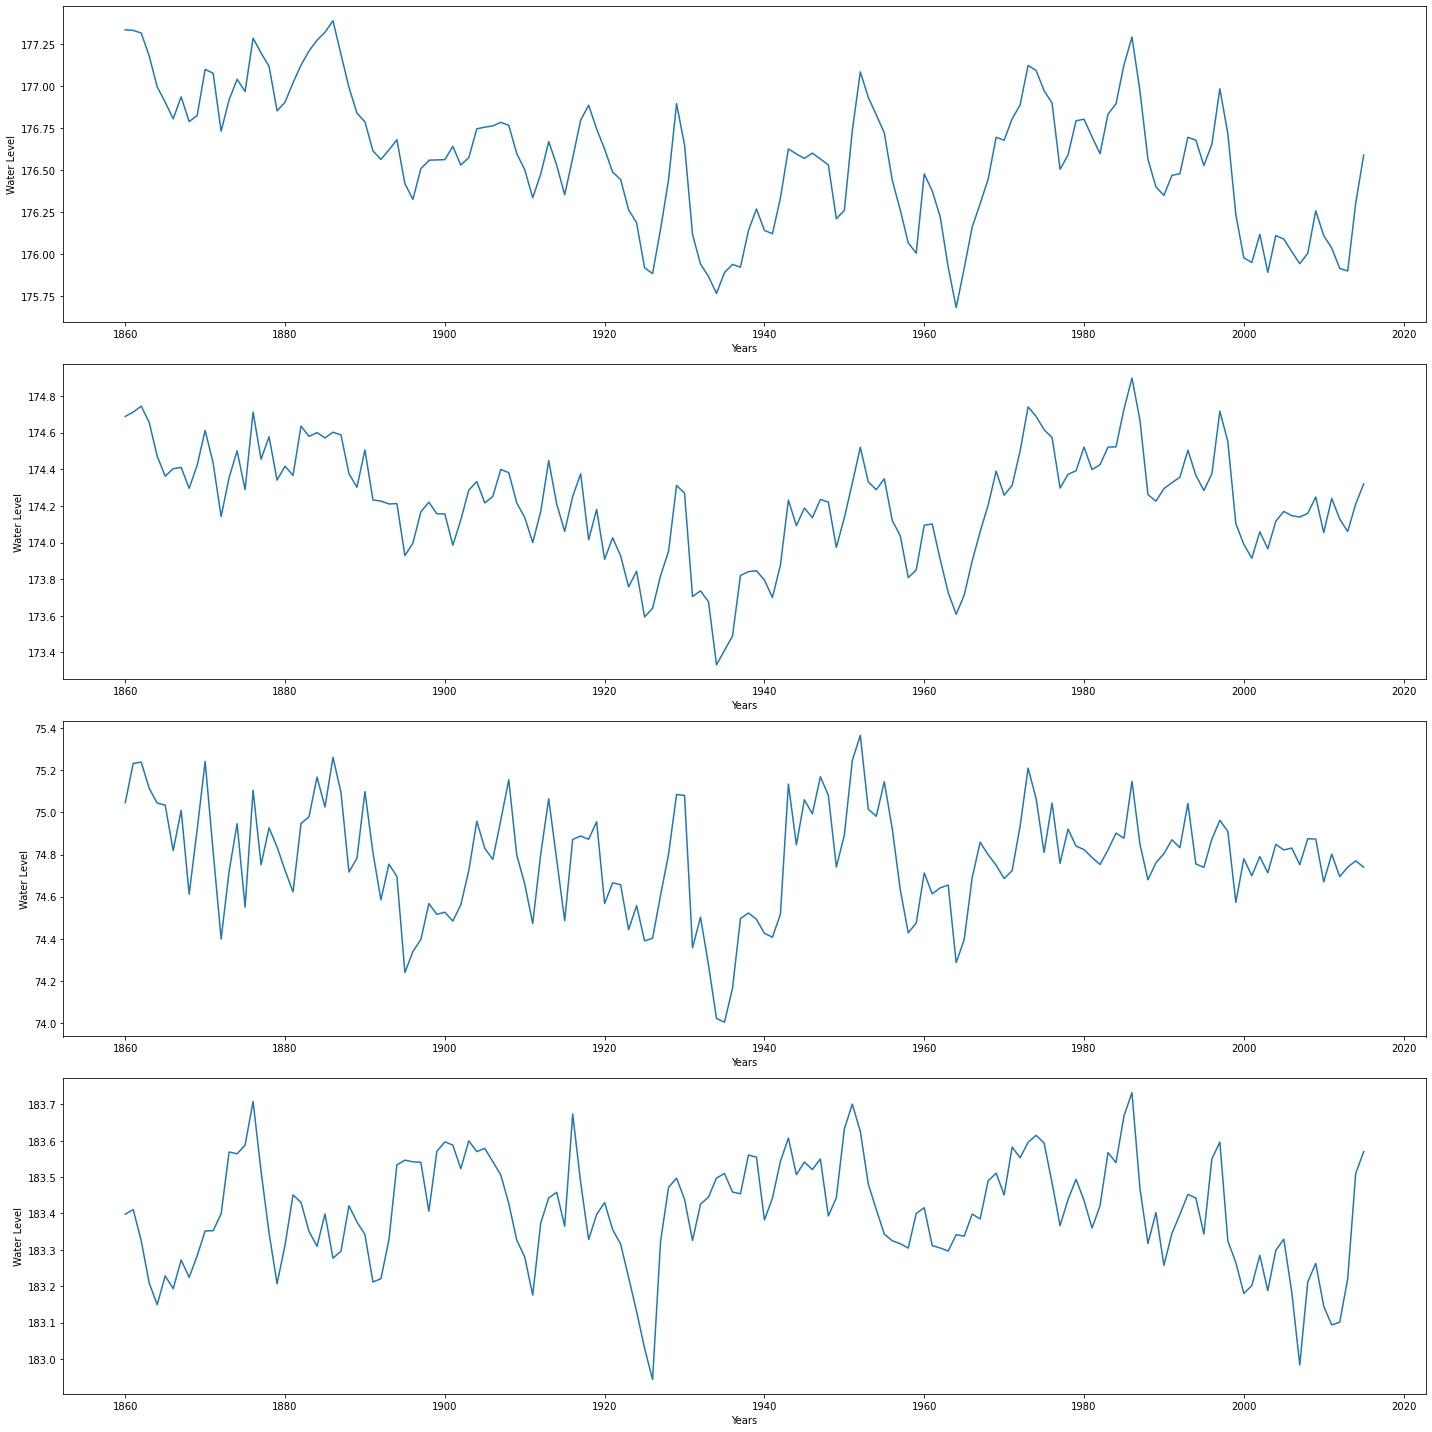

In [69]:
# Put your code here to make each plot separately. You might need to create multiple notebook cells or use "subplot"
# Make sure they are professionaly constructed using all of the options above.
plt.rcParams["figure.figsize"] = (20,20)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

ax1.plot(mhu_date, mhu_level)
ax1.set_xlabel("Years")
ax1.set_ylabel("Water Level")
ax2.plot(erie_date, erie_level)
ax2.set_xlabel("Years")
ax2.set_ylabel("Water Level")
ax3.plot(ontario_date, ontario_level)
ax3.set_xlabel("Years")
ax3.set_ylabel("Water Level")
ax4.plot(superior_date, superior_level)
ax4.set_xlabel("Years")
ax4.set_ylabel("Water Level")
plt.tight_layout()
plt.savefig(f"water_levels_subplots_{USER_NAME}.PNG")

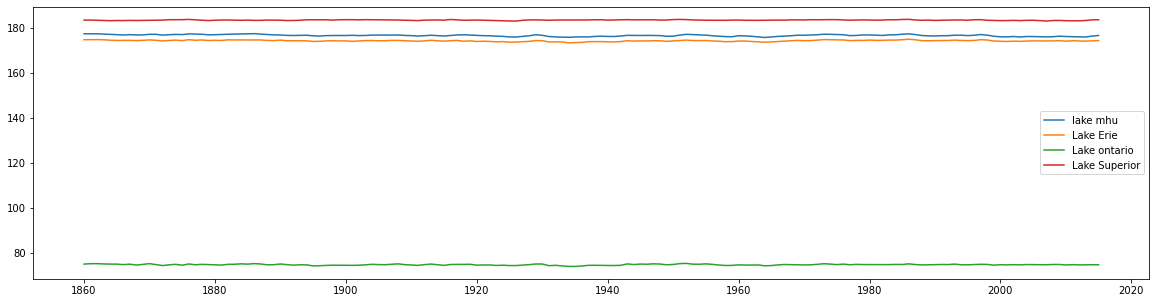

In [70]:
# Make another plot here with all the data in the same plot and include a legend
# It still might not be super useful, but at least with a legend you can tell which line is which!
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(mhu_date, mhu_level,label="lake mhu")
plt.plot(erie_date, erie_level, label="Lake Erie")
plt.plot(ontario_date, ontario_level, label="Lake ontario")
plt.plot(superior_date,superior_level, label="Lake Superior")
plt.legend()
plt.savefig(f"water_levels_combined_{USER_NAME}.PNG")

&#9989;&nbsp; **What observations about the data do you have?** **Do you see any overall trends? Put your answer here**:

<font size="+3">&#9998;</font> In the data I see that Lake ontario has very less water level compared to all others. Lake mhu and Lake Erie have similar water levels. Lake superior has slightly more water levels compared to mhu and Erie. Lake Superior has the highest water level. Lake mhu ranks second. Lake erie ranks third and Lake ontario ranks last in the level of water.  
One important trend i see is that the water level in all lakes has fluctuated a lot. This is more clear in individual plots rather than the combined plot.

___
### Looking for correlations in data.
___

In the plots you have made so far you have plotted water levels versus time. This is fairly intuitive and corresponds to the way the data was given to us. Next, we are going to do something a little more abstract to seek correlations in the data, a standard goal in data science. As you have seen, there are a lot of fluctuations in the data - what do they tell us? For example, do the levels go up at certain times of year? In certain years that had more rain? Can we see evidence of global warming? While we won't answer these questions at this point, we can look for patterns across the lakes to see if the fluctations in levels might correspond to trends. To do this, we will plot the **level of one lake versus the level of another lake** (we will *not* plot either level against time). Note that we somewhat lose the time information because we aren't using that array anymore. 

Look at these plots. Think about what they are telling us.

![correlations](https://c1.staticflickr.com/5/4195/34878771446_3d1e5a1173_o.jpg)

&#9989;&nbsp; Now, in the cell below, plot the **level of one lake versus the level of another lake (time should *not* be involved in your plot command)** - do this for several combinations. Put them in separate cells if you need to - otherwise each will be in the same plot, which might be less useful. (If you're feeling comfortable using [subplot](https://matplotlib.org/examples/pylab_examples/subplots_demo.html) feel free to use that.)

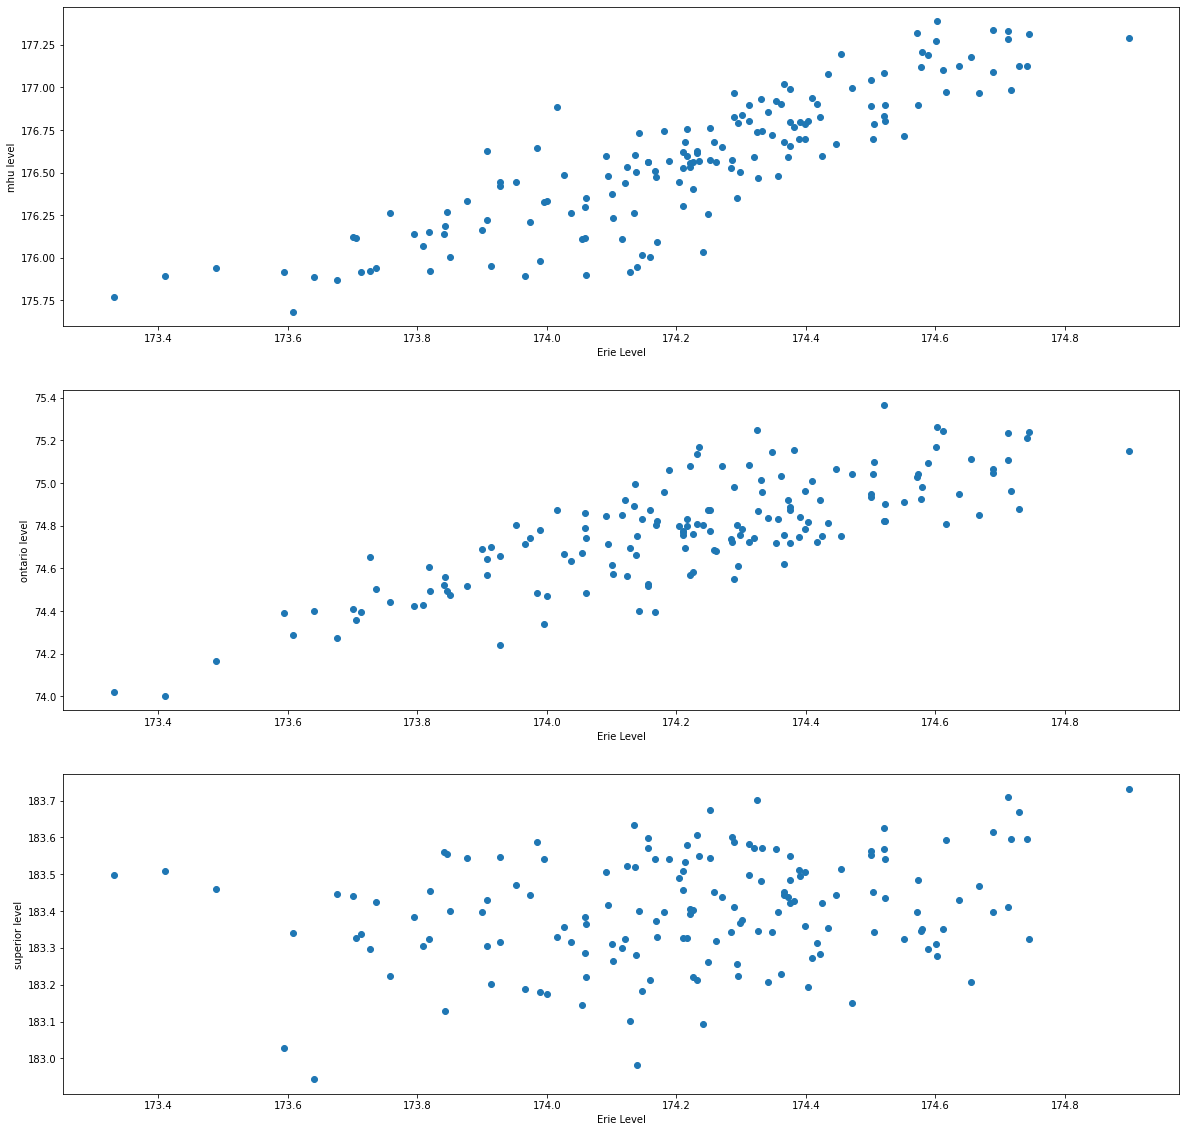

In [71]:
# add your plots here (with labels, titles, legend, grid)
# what line type should you use? what are the best markers to use?

#Correlation plots for erie lake vs rest

plt.rcParams["figure.figsize"] = (20,20)
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(erie_level, mhu_level)
ax1.set_xlabel("Erie Level")
ax1.set_ylabel("mhu level")

ax2.scatter(erie_level, ontario_level)
ax2.set_xlabel("Erie Level")
ax2.set_ylabel("ontario level")

ax3.scatter(erie_level, superior_level)
ax3.set_xlabel("Erie Level")
ax3.set_ylabel("superior level")
plt.savefig(f"erie_vs_rest_water_level_corr_{USER_NAME}.PNG")

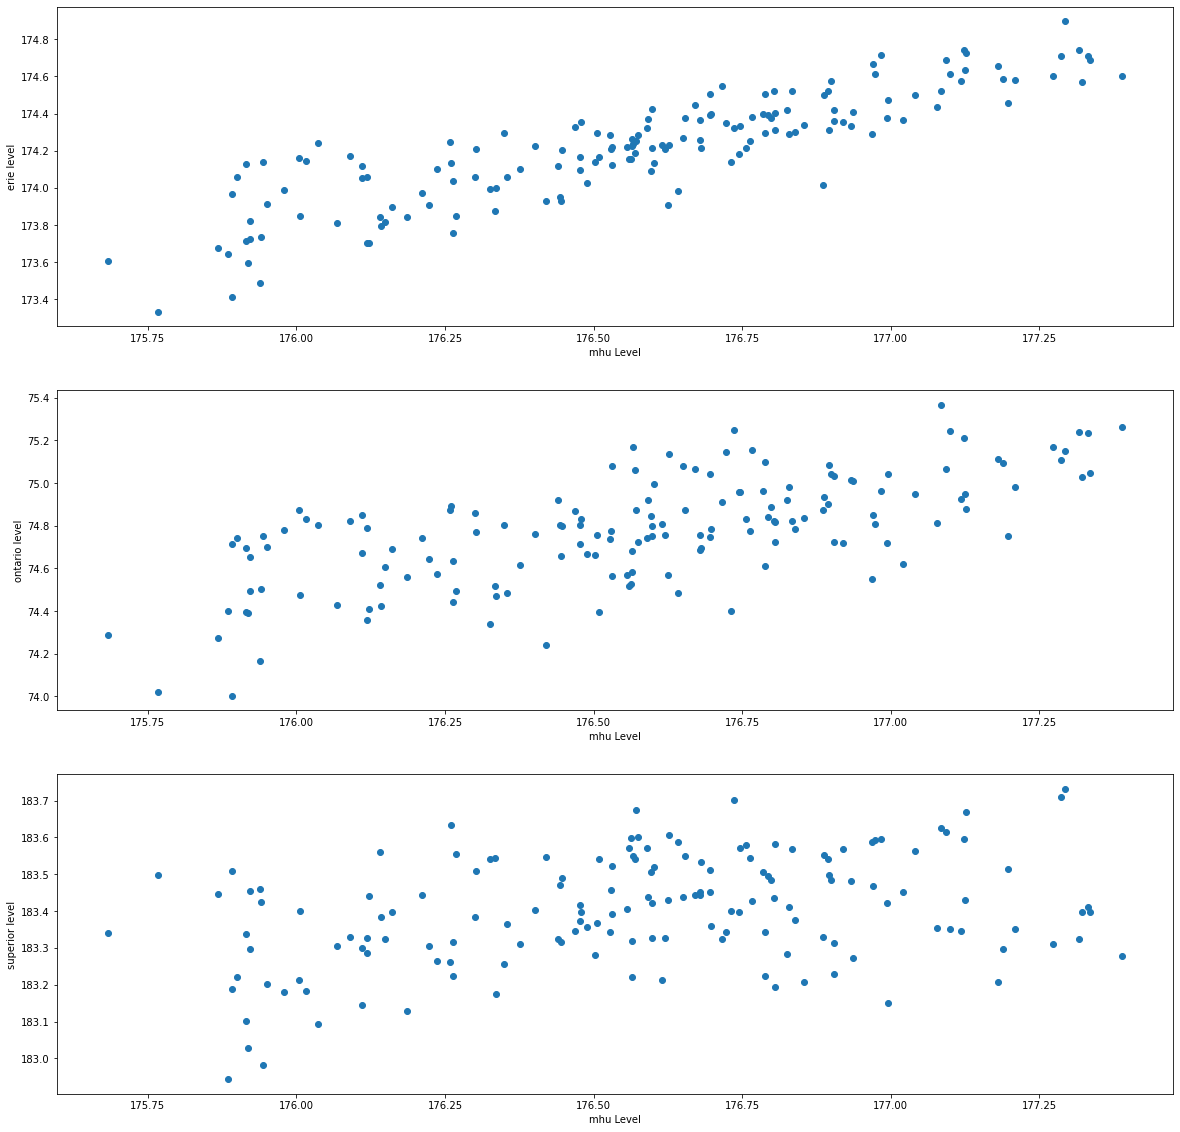

In [72]:

# next lake here, and so on.....
#Correlation plots for ontario lake vs rest

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(mhu_level, erie_level)
ax1.set_xlabel("mhu Level")
ax1.set_ylabel("erie level")

ax2.scatter(mhu_level, ontario_level)
ax2.set_xlabel("mhu Level")
ax2.set_ylabel("ontario level")

ax3.scatter(mhu_level, superior_level)
ax3.set_xlabel("mhu Level")
ax3.set_ylabel("superior level")
plt.savefig(f"mhu_vs_rest_water_level_corr_{USER_NAME}.PNG")

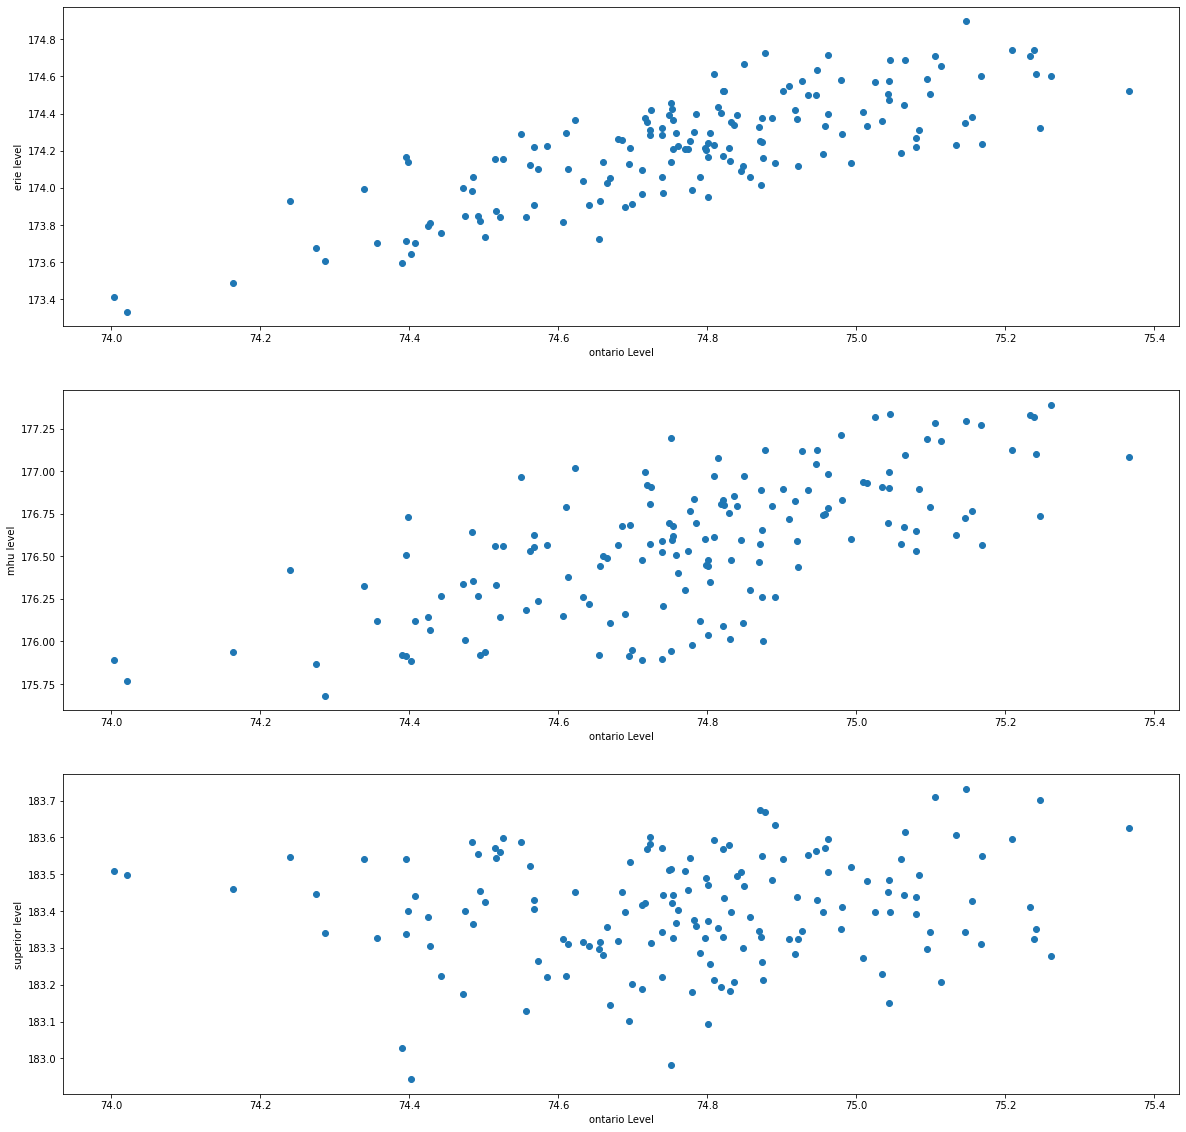

In [73]:
#Correlation plots for erie lake vs rest

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(ontario_level, erie_level)
ax1.set_xlabel("ontario Level")
ax1.set_ylabel("erie level")

ax2.scatter(ontario_level, mhu_level)
ax2.set_xlabel("ontario Level")
ax2.set_ylabel("mhu level")

ax3.scatter(ontario_level, superior_level)
ax3.set_xlabel("ontario Level")
ax3.set_ylabel("superior level")
plt.savefig(f"ontario_vs_rest_water_level_corr_{USER_NAME}.PNG")

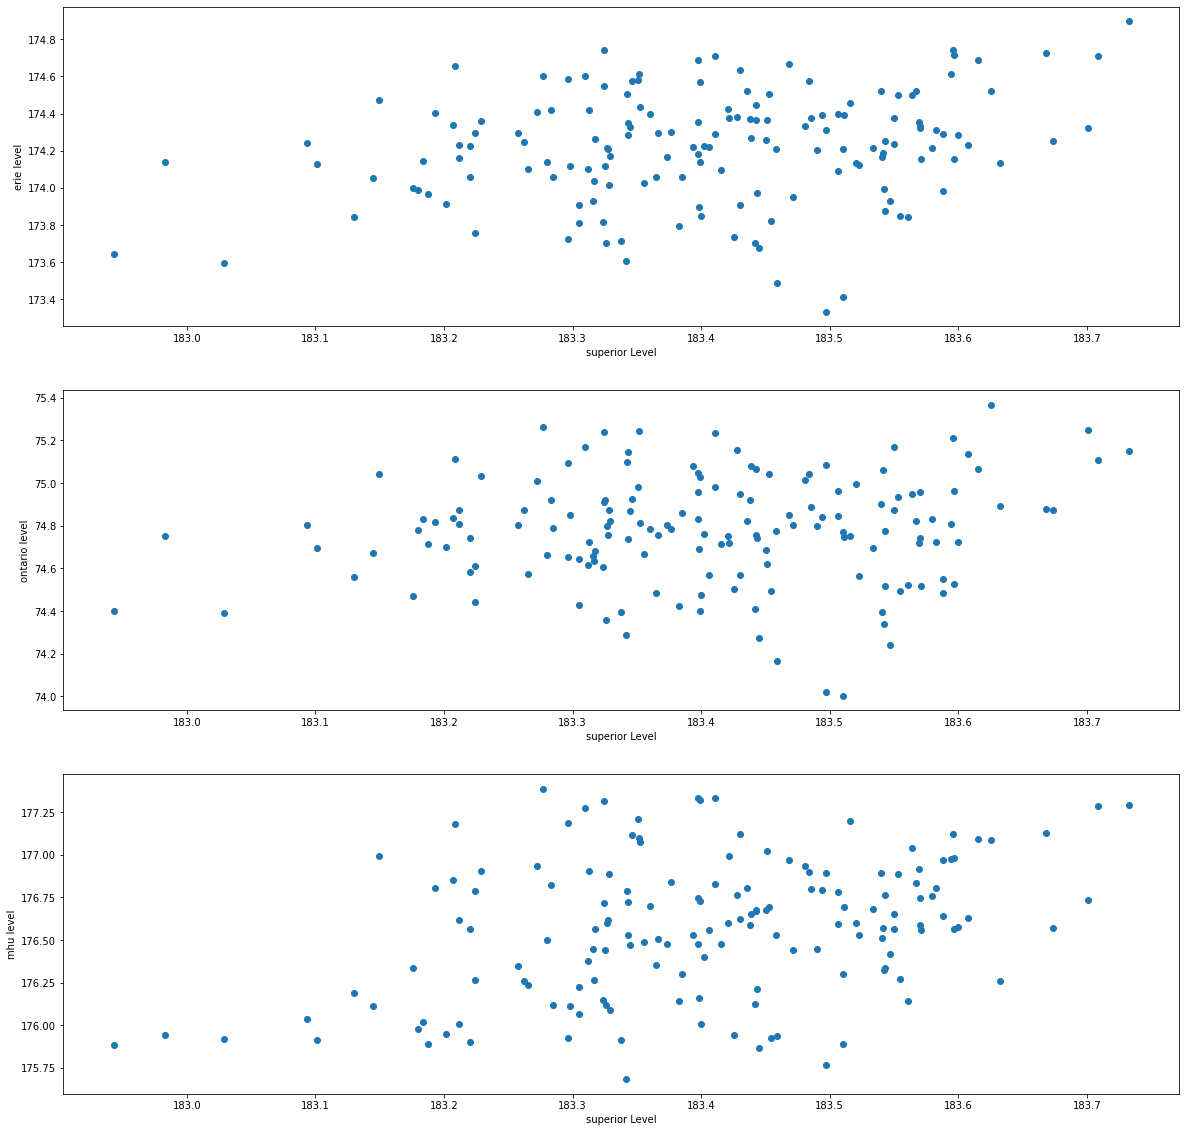

In [74]:
#Correlation plots for erie lake vs rest

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.scatter(superior_level, erie_level)
ax1.set_xlabel("superior Level")
ax1.set_ylabel("erie level")

ax2.scatter(superior_level, ontario_level)
ax2.set_xlabel("superior Level")
ax2.set_ylabel("ontario level")

ax3.scatter(superior_level, mhu_level)
ax3.set_xlabel("superior Level")
ax3.set_ylabel("mhu level")
plt.savefig(f"superior_vs_rest_water_level_corr_{USER_NAME}.PNG")

&#9989;&nbsp; **In this cell**, write your observations. What can you saw about the lake levels? 

<font size="+3">&#9998;</font> I observed the following  

- Correlation of (x,y) is same as correlation of (y,x). So, few of the above plots seemed to be redundant
- There is a strong correlation between water levels for (Erie, Mhu lake) and (Erie, ontario Lake).
- There is a No correlation between water levels of Superior Lake with any of the other lakes
- There is a small positive correlation between water levels of mhu and ontario lake
- I don't see any negative correlations of water levels between any of the lakes



___
### Saving Plots
___
Finally, you will need to use your plots for something. In your other classes and labs you often will need to make plots for your assignments and lab reports - now is the time to start using Python for that! Modify the code above to write the plot into a file in PNG format. Here are a couple of examples for how you can save files as a PNG file and as a PDF file:

`plt.savefig('foo.png')`

`plt.savefig('foo.pdf')`

**Put your name in the filename** so that we can keep track of your work.

---
## Part 2: Debugging Practice
#### (if you have time! if you don't, you're encouraged to work through this on your own later)

### What does it mean to debug a program or piece of code?

Consider the following common error.  This error occurs often when someone who is used to using the older version of Python, Python 2, but is now trying to write code with Python 3, which is what we use in class.

In [ ]:
# Execute this cell and read the error output
print "Hello world"

Note that the error is extremely simple, it tells us where the problem is, on line 2, which is the only piece of actual code in this example.  It also puts a pointer in the line where Python thinks that the error may have occurred. 

The type of error is a "SyntaxError" which typically means you typed something wrong and the code couldn't run. More importantly is the message that comes after the SyntaxError.  This message says "Missing parentheses in call to 'print'"  What does that mean?  Well in this case we could take it quite literally and decide to add some parentheses (this is a good guess).  However, maybe we are not sure where to add them or even what is a parentheses.  My recommendation is to use your favorite search engine to search for the error.  Note you may want to include some keywords such as Jupyter or Python to help limit the search. 

Now we'll break down the debugging process into a series of steps:

### Step 1: Where is the bug occuring?

When you encounter an error in your code, you want to make sure you look at the very end of the error output to determine exactly what the error is. Then, in order to actually solve the error, you first need to figure out where it is happening.  When the code produces an error, Python creates a "Traceback" which shows exactly what parts of the ran into problems.  The first part of Traceback actually tells you what line in the code that you wrote is causing the error, so once you understand what the error is, you'll want to look at the very top of the error output to figure out which line started all of the trouble. You should get into the habit of carefully reading the Python error messages because they are trying to help you! You'll get some practice with this later on.

### Step 2: What is causing the bug?
The second step in our debugging process is to figure out what is causing the bug. Some types of bugs are so common that they are given special names. The following is a list of some common bugs that occur in many different languages with examples in python. Review the examples and make sure you understand what is causing the bug in each:

> Forgive your enemies, but never forget their names. -  John F. Kennedy

For practice, run the cells and when possible, **fix the bug!**

**Syntax bug** - Something is spelled or typed in a way that the interpreter or compiler doesn't understand.  Syntax errors are the cause of many bugs. Sometimes the python interpreter is helpful and lets you know that it found some invalid syntax. For example:

In [ ]:
import random

x = random.random()
if x > 0.5
    print("big")
else:However, sometimes a syntax error is less obvious. For example:
    print('little')

However, sometimes a syntax error is less obvious. For example:

In [ ]:
message = 'hello world

if message:
    print(message)

**Off by one bug** - Program is accessing an indexed list or container and uses the size of the list as an index. In Python this error generally throws an "Index out of range" error.

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_list[5]

**Divide by Zero bug** - Program is trying to divide a number by zero.  This is invalid. In Python this error generally throws a "ZeroDivisionError"

In [ ]:
x = 100/0

**Type bug** - The operation in a program is expecting a variable of a specific type but the variable given is a wrong. Python throws a "TypeError" with a explanation of what the type conflict was caused by.

In [ ]:
first = 10
second = '10'
print(first + second)

### Step 3: How do you fix the bug? (Time to practice!)

The follow pieces of code below have multiple errors. Some of them are standard Python errors, but in some cases, the code isn't working as intended, despite not causing any errors.

&#9989;&nbsp; Your job is to run the code, identify the errors, and then fix the code. **When you fix a piece of code, add a comment that says what the error was**.

**Cool Jupyter trick**: You can turn on line numbers in a jupyter cell as follows:
1. Select the sell by clicking the words just to the left of an input cell (ex 'In[31]:') This should turn the left side of the cell <font color='blue'>blue</font>
2. If the left side of the cell is <font color='blue'>blue</font> hit the letter 'l' (lowercase L) to toggle line numbers on and off
3. For a complete list of keyboard shortcuts go to the Jupyter "Help" menu and select "Keyboard Shortcuts." These can come in handy. 

In [ ]:
'''
This code is supposed to plot 3 different mathematical functions
using three different line styles and colors all on the same plot.
'''
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 30)
y1 == x**2
y2 = 0.3*x**3 - 3.5
y3 = 0.01*x**4 + 2*x^2 - 10.0

plt.plot(x, y1, color="cornflowerblue", linestyle=":")
plt.plot(x, y2, color="salmon, marker='d', linestyle="-")
plt.plot(x, y3, color="seagreen", linestyle="--", lw="2")
plt.grid[]

In [ ]:
'''
This code is intended to model the approximate trajectory
of a cannonball as a function of time. The result should
look like an upside down parabola when we look at it in
the x-y domain.
'''

# Create lists for storing values
x = []
y = []
xvel = []
yvel = []

# Define gravitational acceleration
gravity = -9.8

# Define the initial conditions
# and add them to the lists
current_x = 0
current_y = 0
current_xvel = 50
current_yvel = 50

# Define the time range for the problem
# As well as the delta_t
time = np.arange(0, 10, 0.1)
delta_t = time[1] - time[0]

# Set up a loop for iterating through time
# so that we can move the cannonball forward
# in time (and consequently, space)
for t in time:
    x.append(current_x)
    y.append(current_y)
    xvel.append(current_xvel)
    yvel.append(current_yvel)
    new_x = current_x + current_xvel * delta_t
    new_y = current_y + current_yvel * delta_t
    new_xvel = current_xvel
    new_yvel = current_yvel + gravity * delta_t
    current_x = new_x
    current_xvel = new_xvel
    current_yvel = new_yvel

# Make plots
# Top plot: x vs. time
# Middle plot: y vs. time
# Bottom plot: y vs. x
plt.figure(figsize=(5,8))
plt.subplot(3,1,1)
plt.plot(time, x)
plt.xlabel("time")
plt.set_ylabel("x")
plt.subplot(3,1,2)
plt.plot(time, y)
plt.set_xlabel("time")
plt.set_ylabel("y")
plt.subplot(3,3)
plt.plot(x,y)
plt.set_xlabel("x")
plt.set_ylabel("y")
plt.subplots_adjust(hspace=0.5)

## Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-class assignments" folder, find the appropriate submission folder, and upload it there. Make sure to upload your plot images as well!

If the rest of your group is still working, help them out and show them some of the things you learned!

See you next class!

---
